# South-African-Language-Identification-Hack

## Honour Code

I, KEDIJANG SETSOME, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the EDSA honour code.
Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction </a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

- <a href=#four.1>4.1 Target Variable Analysis</a>

- <a href=#four.2>4.2 Tweets Analysis</a>

<a href=#five>5. Feature Engineering</a>

- <a href=#five.1> Text Cleaning</a>

- <a href=#five.2> Stopwords Removal</a>

- <a href=#five.3> Text Normalization</a>

- <a href=#five.4> Clean Data Analysis</a>

<a href=#six>6. CLeaning Imbalanced Data</a>

- <a href=#six.2>6.1 Sorting Sentiment</a>

<a href=#seven>7. Data Modeling</a>

- <a href=#seven.1>7.1 Training Models</a>

<a href=#eight>8. Cleaning Test Data</a>

<a href=#nine>9. Submission</a>

- <a href=#nine.2>9.1 Model Submission</a>

<a href=#nine>9. Conclusion</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, I will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

 <a id="one"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries For Data Preprocessing:
import re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import TreebankWordTokenizer
from nltk import WordNetLemmatizer

# Libraries For Feature Extraction, Model Building and Evaluation:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report

# Library For Saving and Retrieving the Model File:
import pickle

# Library For handling warnings:
import warnings

warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 45 # random_state parameter for the train_test_split function

<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Loading in the Data
df_train =  pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


- The DataFrame contains two columns, lang_id, and text. These represent the language label and the language text respectively. The next step will be to display the information summary of the DataFrame.

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In the exploratory data analysis, the following questions will be answered to get insights from the dataset:

- check for number of columns present & datatypes present in the dataset
- look for any missing values
- Also look for any duplicated values
- Check for any relationships between the variables

In [5]:
df_train.shape

(33000, 2)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


- We have now found out that the data has only 2 columns and 33000 rows.

- The datatypes apearing are non numeric.

In [7]:
df_test.shape

(5682, 2)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [9]:
#checking for nulls

print(np.sum(df_train.isnull().any(axis=1)))
print(np.sum(df_test.isnull().any(axis=1)))

0
0


Simply displaying the train and test data to have a look at the actual data contained within the first 5 columns.

The lang_id column contains differnet languages.

The text column contains messages from different people expressing their views in different languages.

There are no null values in the data, so we can proceed to data cleaning.

In [10]:
#checking unique target values
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

- The above displayed is a list of the language codes representing each of the 11 official South African languages. These are also class labels. For the purpose of building an accurate classification model later in this project, it is important to ensure that the class labels are balanced.

In [11]:
df_train["lang_id"].value_counts() # There are 11 languages and 3000 sentenses in each category

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

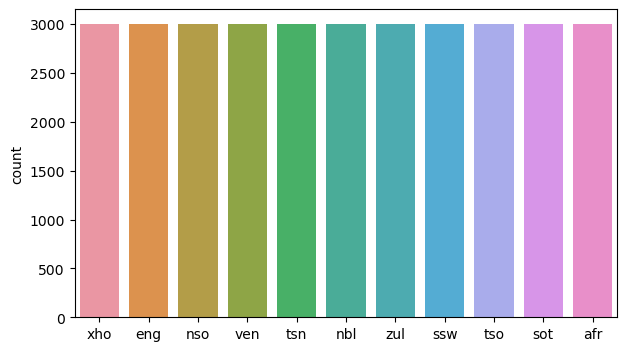

In [12]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=df_train, x=df_train['lang_id'].unique(), y=df_train['lang_id'].value_counts())
plt.show()

- The bar plot indicates that there is an even class distribution. 3000 records for each respective class.

6.4
4.8


<Axes: ylabel='count'>

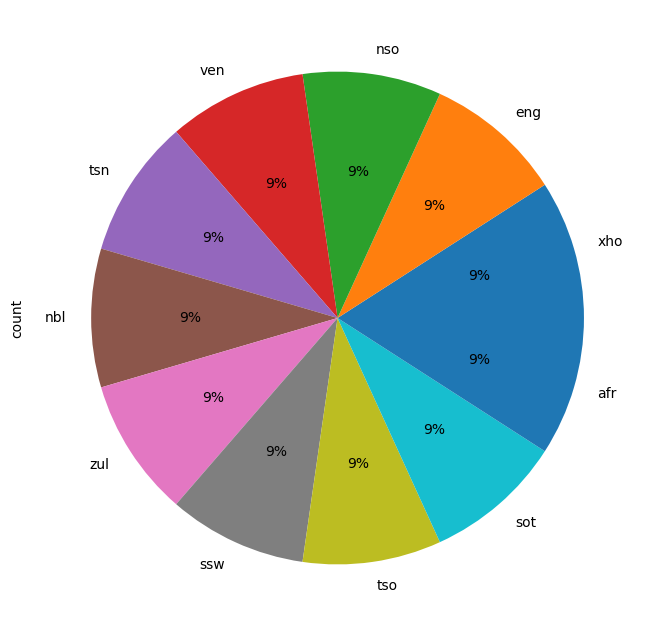

In [13]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
df_train.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [14]:
#Summary statistics

df_train[['lang_id']].describe().T

,count,unique,top,freq
lang_id,33000,11,xho,3000


<a id="four"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [15]:
#Making a copy of both the train and test data

df = df_train.copy()
dft = df_test.copy()

<a id="four.1"></a>
### 5.1 Text Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In context of text analytics, removing noise is a vital part of getting the data into a usable format. For the train dataset, the following will be done:


*   making everything lower case
*   removing punctuation
*   removing digits and words containing digits
*   removing hashtags, emojis, and unknown characters

### Language Cleaner Function

In [16]:
def tweet_cleaner(language):
    
    """
    This function is necessary to remove punctuation, hashtags, 
    numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    language = language.lower() 
    
    # Remove punctuation
    language = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', language)
    
    # Remove hashtags
    language = re.sub(r'#\w*', '', language)    
    
    # Remove numbers
    language = re.sub(r'\d+', '', language)  
    
    # Remove whitespace in front of language
    language = language.lstrip(' ')   
    
    # Remove extra whitespace
    language = re.sub(r'\s\s+', ' ', language)
                          
    
    return language

In [17]:
df['text'] = df['text'].apply(tweet_cleaner)
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Removing Unknown Characters

In [18]:
#removing the uknown charecters from words

pattern_url = r'[^A-Za-z ]'
subs_url = r''
df['text'] = df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

<a id="four.2"></a>
### 5.2 Stopwords Removal
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Stop words are used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information for machine algorithms. For example, in the context of a search system, if your search query is “what is a stop word?”, you want the search system to focus on surfacing documents that talk about "stop word" over documents that talk about "what is a".The following code block defines the library to be used for stop word removal. It also removes the stop words from the train dataset.

In [19]:
#Defining the list of stopword wished to be removed. 

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'but', 'by', 'can', 'd', 'did',
             'does', 'doesn', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'shan', "shan't", 'she', "shes", 'should', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', 'thatll', 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'wa', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'you', 've', 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(word):
    return " ".join([word for word in str(word).split() if word not in STOPWORDS])

In [20]:
# using the cleaning stopwords function on the message column

df['text'] = df['text'].apply(lambda word: cleaning_stopwords(word))
df[['text']].head()

,text
0,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,province kwazulunatal department transport inv...
3,netefata gore ba file dilo ka moka te le dumel...
4,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="four.3"></a>
## 5.3 Text Normalization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.3.1 Tokenisation

Tokenization refers to the straightforward transformation of raw information into a structured string of data. In the realm of Natural Language Processing, it serves to break down paragraphs and sentences into smaller components (tokens), facilitating a more efficient interpretation of their significance.

In [21]:
#Creating tokenised column

tokeniser = TreebankWordTokenizer()
df['token'] = df['text'].apply(tokeniser.tokenize)

In [22]:
df.head()

,lang_id,text,token
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport..."
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


### 5.3.2 Lemmatization

Lemmatization is a systematic and methodical approach to deriving the base or root form of a word, employing both vocabulary knowledge (the importance of words in a dictionary) and morphological analysis (considering word structure and grammar relationships).

Performing lemmatization on the text within a dataset is crucial to render it comprehensible for the machine.

In [23]:
lemmatizer = WordNetLemmatizer()

def df_lemmatization(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [24]:
df['lemmatization'] = df['token'].apply(df_lemmatization, args=(lemmatizer, ))

In [25]:
df.tail()

,lang_id,text,token,lemmatization
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,...","[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na ntse sa utlwe hore thabang ra...,"[modise, mosadi, na, ntse, sa, utlwe, hore, th...","[modise, mosadi, na, ntse, sa, utlwe, hore, th..."
32997,eng,closing date submission completed tenders augu...,"[closing, date, submission, completed, tenders...","[closing, date, submission, completed, tender,..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants...","[nawuphina, umntu, ofunyenwe, enetyala, phants..."
32999,sot,mafapha mang le ona lokela ho etsa ditlaleho t...,"[mafapha, mang, le, ona, lokela, ho, etsa, dit...","[mafapha, mang, le, ona, lokela, ho, etsa, dit..."


- Now that the data has been cleaned, a new column consisting of the lemmmatized words in string datatype will be created and used going forward in this report.

In [26]:
df['lemmatized_str'] = [' '.join(map(str,l)) for l in df['lemmatization']]
df.head()

,lang_id,text,token,lemmatization,lemmatized_str
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport...",province kwazulunatal department transport inv...
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,...",netefata gore ba file dilo ka moka te le dumel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="five"></a>
## 6. Cleaning Imbalanced Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
Cleaning imbalanced data involves addressing the unequal distribution of classes in a dataset. It aims to balance class representation to prevent biases in machine learning models. Techniques like resampling (upsampling, downsampling), SMOTE, or using specialized algorithms help create a more even class distribution for fairer model training and better predictive performance.


<a id="six"></a>
## 7. Data Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


**Multi-label classification** involves classification tasks encompassing two or more class labels, where individual examples might be associated with one or more class labels. Due to the presence of multiple classes in this data, employing multi-class classification algorithms becomes essential for accurate outcomes.

In this segment, we'll conduct training and prediction using several well-known algorithms suitable for multi-class classification:

- Logistic Regression
- Support Vector Machine
- Random Forest Classifier
- Bernoulli Naive Bayes
- K-Neighbors Classifier


### Split Data Into Features and Labels:

In [27]:
# Define Features and Labels:
X = df_train['text'] # Features
y = df_train['lang_id'] # Labels

In [28]:
# create a scaler object
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [29]:
# dividing X, y into train and test data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X, y, test_size=0.2, random_state = 50)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_up_vect = vectorizer.fit_transform(X_train_up)
X_test_up_vect = vectorizer.transform(X_test_up)

# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_up_scaled = scaler.fit_transform(X_train_up_vect)
X_test_up_scaled = scaler.transform(X_test_up_vect)

<a id="six.1"></a>
### 7.1 Training Models
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### Logistic Regression
Logistic regression establishes a link between predictor variables and a categorical outcome. It aids in estimating the likelihood of belonging to a specific category within the response variable based on a given set of predictors.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [32]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train_up_vect,y_train_up)

LogisticRegression(multi_class='ovr')

In [33]:
y_pred = lr.predict(X_test_up_vect)

In [34]:
print('Linear logistics perfomance report')
print(classification_report(y_test_up, y_pred ))

Linear logistics perfomance report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       1.00      1.00      1.00       595
         nbl       0.99      0.97      0.98       594
         nso       1.00      1.00      1.00       581
         sot       1.00      1.00      1.00       600
         ssw       0.99      1.00      0.99       601
         tsn       1.00      1.00      1.00       609
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       0.98      1.00      0.99       606
         zul       0.98      0.98      0.98       598

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



#### SVC - Support Vector Classifier
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The algorithm creates a line or a hyperplane which separates the data into classes.

In [35]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
model_svc = svc.fit(X_train_up_vect,y_train_up)
model_svc

SVC()

In [36]:
y_pred2 = svc.predict(X_test_up_vect)

In [37]:
print("\n\n Support Vector Machine perfomance report:\n\n", classification_report(y_test_up, y_pred2))
#log_confusion_matrix()



 Support Vector Machine perfomance report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       1.00      1.00      1.00       595
         nbl       1.00      0.98      0.99       594
         nso       1.00      0.99      1.00       581
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       601
         tsn       1.00      1.00      1.00       609
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       0.98      1.00      0.99       606
         zul       0.99      0.99      0.99       598

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



#### Random Forest Classifier
The Random Forest Classifier is an ensemble algorithm composed of numerous decision trees. It employs bagging and introduces randomness in feature selection when constructing each tree. The aim is to generate an uncorrelated collection of trees, wherein the combined predictions from multiple trees result in greater accuracy compared to any single tree on its own.

In [38]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
rf = RandomForestClassifier()

rf.fit(X_train_up_vect, y_train_up)
y_pred3 = rf.predict(X_test_up_vect)

In [40]:
print("\n\nRandom Forest Classifier performance report:\n\n", classification_report(y_test_up, y_pred3))



Random Forest Classifier performance report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       0.99      1.00      1.00       595
         nbl       0.99      0.94      0.96       594
         nso       1.00      1.00      1.00       581
         sot       1.00      1.00      1.00       600
         ssw       0.97      0.98      0.97       601
         tsn       1.00      1.00      1.00       609
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       0.97      0.99      0.98       606
         zul       0.95      0.96      0.95       598

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



#### Multinomial Naive Bayes

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [42]:
MNBmodel = MultinomialNB()
MNBmodel_fit = MNBmodel.fit(X_train_up_vect, y_train_up)

In [43]:
y_pred4 = MNBmodel.predict(X_test_up_vect)

In [44]:
print("\n\nMiltinomial Naive Bayes perfomance report:\n\n", classification_report(y_test_up, y_pred4))



Miltinomial Naive Bayes perfomance report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       0.99      1.00      1.00       595
         nbl       1.00      1.00      1.00       594
         nso       1.00      1.00      1.00       581
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       601
         tsn       1.00      1.00      1.00       609
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       1.00      1.00      1.00       606
         zul       1.00      0.99      0.99       598

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Models Comparison

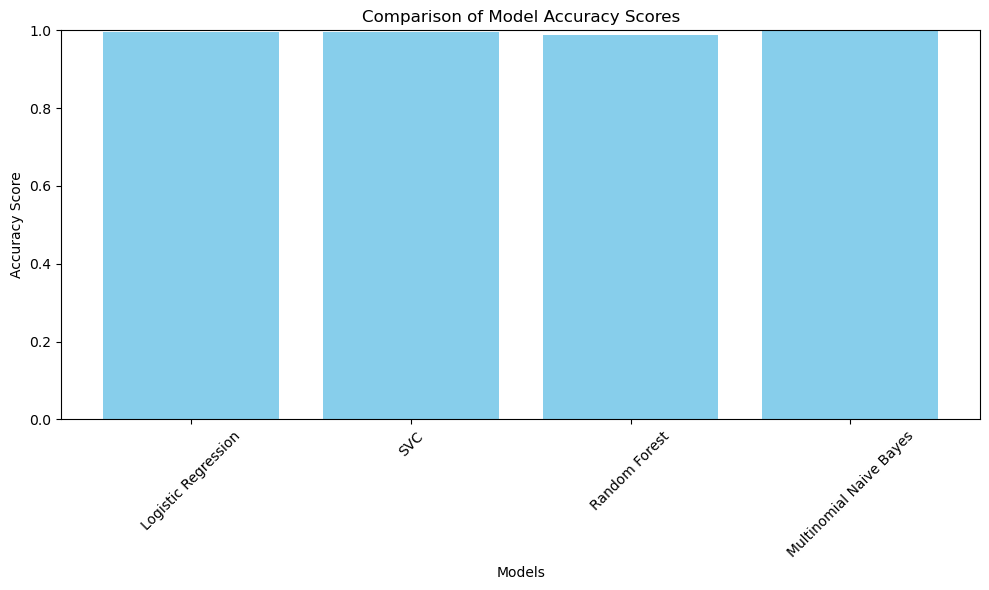

In [45]:
# Assuming X_train_up_vect, y_train_up, X_test_up_vect, y_test_up are defined

# Train Logistic Regression model
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train_up_vect, y_train_up)
y_pred_lr = lr.predict(X_test_up_vect)
accuracy_lr = accuracy_score(y_test_up, y_pred_lr)

# Train Support Vector Classifier (SVC) model
svc = SVC(kernel='rbf')
svc.fit(X_train_up_vect, y_train_up)
y_pred_svc = svc.predict(X_test_up_vect)
accuracy_svc = accuracy_score(y_test_up, y_pred_svc)

# Train Random Forest Classifier model
rf = RandomForestClassifier()
rf.fit(X_train_up_vect, y_train_up)
y_pred_rf = rf.predict(X_test_up_vect)
accuracy_rf = accuracy_score(y_test_up, y_pred_rf)

# Train Multinomial Naive Bayes model
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train_up_vect, y_train_up)
y_pred_mnb = MNBmodel.predict(X_test_up_vect)
accuracy_mnb = accuracy_score(y_test_up, y_pred_mnb)

# Store accuracy scores in a list
accuracy_scores = [accuracy_lr, accuracy_svc, accuracy_rf, accuracy_mnb]
models = ['Logistic Regression', 'SVC', 'Random Forest', 'Multinomial Naive Bayes']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy scores
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<a id="seven"></a>
## 8. Cleaning Test Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

For the competition submission the chosen model for deployment, the data cleaning steps will be repeated on the test data before completing any submissions.

In [46]:
def language_cleaner(language):
    
    """
    This function is necessary to remove punctuation, hashtags, 
    numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    language = language.lower() 
    
    # Remove punctuation
    language = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', language)
    
    # Remove hashtags
    language = re.sub(r'#\w*', '', language)    
    
    # Remove numbers
    language = re.sub(r'\d+', '', language)  
    
    # Remove whitespace in front of tweet
    language = language.lstrip(' ')   
    
    # Remove extra whitespace
    language = re.sub(r'\s\s+', ' ', language)
                          
    
    return language

In [47]:
dft['text'] = dft['text'].apply(language_cleaner)
dft.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [48]:
#removing the uknown charecters from words

pattern_url = r'[^A-Za-z ]'
subs_url = r''
dft['text'] = dft['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [49]:
#Defining the list of stopword wished to be removed. 

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'but', 'by', 'can', 'd', 'did',
             'does', 'doesn', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'shan', "shan't", 'she', "shes", 'should', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', 'thatll', 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'wa', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'you', 've', 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [50]:
dft['text'] = dft['text'].apply(lambda text: cleaning_stopwords(text))
dft[['text']].head()

,text
0,mmasepala fa maemo kgethegileng letlelela kgat...
1,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,tshivhumbeo tshi fana na ngano dza vhathu
3,kube inja nelikati betingevakala kutsi titsini...
4,winste op buitelandse valuta


In [51]:
#Creating tokenised column
tokeniser = TreebankWordTokenizer()

def df_tokenize(words, tokenizer):
    return [tokenizer.tokenize(word) for word in words]

In [52]:
dft.head()

,index,text
0,1,mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [53]:
#lemmatizer
lemmatizer = WordNetLemmatizer()

def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [54]:
dft['text'] = dft['text'].apply(df_lemma, args=(lemmatizer, ))
dft.head()

,index,text
0,1,"[m, m, a, s, e, p, a, l, a, , f, a, , m, a, ..."
1,2,"[u, z, a, k, w, a, z, i, s, w, a, , n, g, o, ..."
2,3,"[t, s, h, i, v, h, u, m, b, e, o, , t, s, h, ..."
3,4,"[k, u, b, e, , i, n, j, a, , n, e, l, i, k, ..."
4,5,"[w, i, n, s, t, e, , o, p, , b, u, i, t, e, ..."


In [55]:
dft['text'] = [' '.join(map(str,l)) for l in dft['text']]

In [56]:
null_values = dft.isnull().sum()
print(null_values)

index    0
text     0
dtype: int64


In [57]:
# Count the number of empty values in the 'sentiment' column
empty_values_count = dft['text'].isna().sum()

print("Number of empty values in 'sentiment' column:", empty_values_count)

Number of empty values in 'sentiment' column: 0


In [58]:
# Traing the model with the entire data
X = df_train['text'] # Features
y = df_train['lang_id']

In [59]:
X_testf = dft['text']

In [ ]:
# extracting features
vectorizer2 = TfidfVectorizer(ngram_range = (1,3))
V_train_Xf = vectorizer2.fit_transform(Xf)
V_test_Xf = vectorizer2.transform(X_testf)

# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_Train_f = scaler.fit_transform(V_train_Xf)
X_Test_f = scaler.transform(V_test_Xf)

In [ ]:
V_test_Xf.shape

In [ ]:
svm_model_linear_f = SVC(kernel='rbf').fit(V_train_Xf,yf)
final_preds = svm_model_linear_f.predict(V_test_Xf)